In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to Load 
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
#Combine the data into a single dataset
merge_data_df = pd.merge(city_data_df, ride_data_df, on="city")

In [ ]:
#Obtain the x and y coordinates for each of the three city types
#Average fares, Total rides and Number of drivers per city
average_fare_city = merge_data_df.groupby("city").mean()["fare"]
total_rides_city = merge_data_df.groupby("city").count()["ride_id"]
total_drivers_city =  city_data_df.groupby("city").sum()["driver_count"]

#Set city types as index
city_type = city_data_df.set_index("city")["type"]

#Create a data frame with calculated variables
city_rides_df = pd.DataFrame({ "Number of Rides": total_rides_city, 
                               "Average Fare": average_fare_city,
                               "Number of Drivers": total_drivers_city,
                               "Type of City": city_type })


#Create data frames for each city category
rural = city_rides_df[city_rides_df['Type of City'] == 'Rural']
suburban = city_rides_df[city_rides_df['Type of City'] == 'Suburban']
urban = city_rides_df[city_rides_df['Type of City'] == 'Urban']


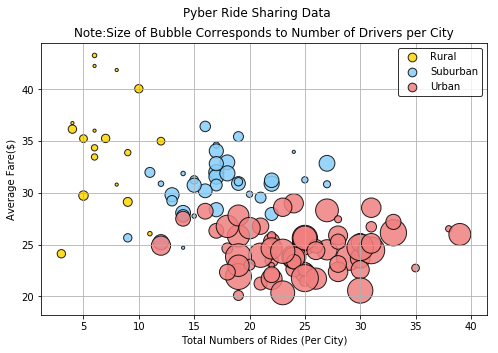

In [11]:
# Build the scatter plots for each city types
plt.figure(figsize = (8,5))

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, facecolors ='Gold', edgecolor = 'black', alpha = .85, label ='Rural')
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, facecolors = 'lightskyblue', edgecolor = 'black', alpha = .85, label = 'Suburban')
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, facecolors = 'lightcoral', edgecolor = 'black', alpha = .85, label = 'Urban')

# Incorporate the other graph properties
plt.suptitle('Pyber Ride Sharing Data')
plt.xlabel('Total Numbers of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend(loc = 'upper right')
plt.grid(True)

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.title('Note:Size of Bubble Corresponds to Number of Drivers per City')

# Save Figure
plt.savefig("./PyberImages/Pyber Ride_Sharing.png")

# Show plot
plt.show()


### TOTAL FARES BY CITY TYPE 

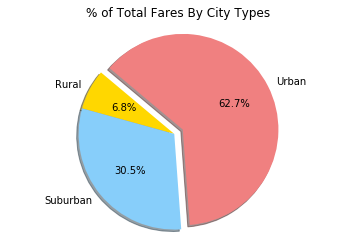

In [8]:
# Calculate Total Fare Percents
total_fare_type = merge_data_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
# Labels for each section of chart 
labels = ["Rural","Suburban","Urban"]

# chart properties
plt.title("% of Total Fares By City Types")
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

# Save Figure
plt.savefig("./PyberImages/% Total Fares By City Type.png")

### TOTAL RIDES BY CITY TYPE

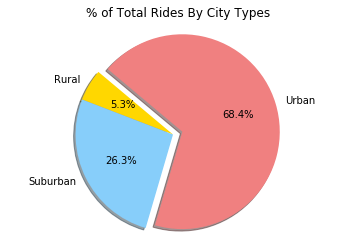

In [9]:
# Calculate Total ride percents
total_rides_type = merge_data_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
# Labels for each section of chart 
labels = ["Rural","Suburban","Urban"]

# chart properties
plt.title("% of Total Rides By City Types")
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

# Save Figure
plt.savefig("./PyberImages/% Total Rides By City Type.png")

### TOTAL DRIVERS BY CITY TYPE

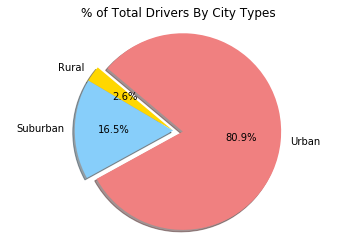

In [10]:
# Calculate Total Drivers percents
total_drivers_type = city_rides_df.groupby(['Type of City'])['Number of Drivers'].sum()

# Build Pie Chart
# Labels for each section of chart 
labels = ["Rural","Suburban","Urban"]

# chart properties
plt.title("% of Total Drivers By City Types")
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

# Save Figure
plt.savefig("./PyberImages/% Total Drivers By City Type.png")

PYBER RIDE-SHARING ANALYSIS:

•	From the data it is evident that there are more drivers and thus more rides in urban areas than in suburban and rural areas combined. This is expected as there is a higher population in urban areas which translates into a higher demand for ride-sharing services. However, the down side of having more drivers and rides in urban areas is the lower average fares compared to suburbs and rural areas. Discounting distance travelled, average fares per ride in the urban areas range from $18 to $30. In the suburbs it is $25 to $36. And in the rural areas it is $24 to $45.
 
•	Drivers in the suburbs and rural areas constitute only 19% of total drivers. However, they contribute 32% of total rides and 37% of total fares. In stark contrast, drivers in urban areas form 81% of the total, and yet partake in only 68% of total rides, and contribute 63% of total fares. It is evident that drivers in the suburbs and rural areas are more efficient and productive in generating revenue. Whilst drivers in the urban areas are probably suffering from too much competition. 

•	It is almost obvious that there is some market saturation in the urban areas. There is some room for growth in the rural areas but most certainly there is a great opportunity for increased business in the suburbs. Overall it will be beneficial to all stakeholders if some drivers are encouraged to move operations to the suburbs.This will help reduce the saturation of urban areas but more importantly it will lead to lower average fares for customers in the suburbs which in turn will drive demand up. The increase in demand will then increase the total fares generated by the ride-sharing firm. 




